In [1]:
import torch
from torch import nn
from torch import optim
import torchmetrics
from torchmetrics import Accuracy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
# Creating a dataset
num_classes = 4
num_features = 2
random_seed = 42

X_blob , y_blob = make_blobs(centers = num_classes,n_features = num_features,random_state = random_seed ,n_samples = 1000)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)



X_train , X_test, y_train,y_test = train_test_split(X_blob,y_blob,test_size = 0.2, random_state = 42 )

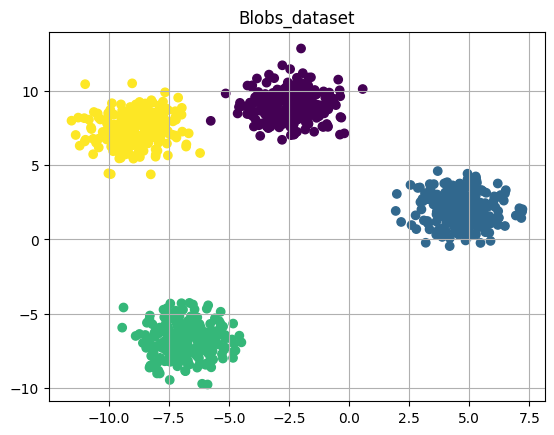

In [3]:
# Visualizing Dataset
plt.title("Blobs_dataset")
plt.scatter(X_blob[:,0],X_blob[:,1], c= y_blob)
plt.grid(True)

In [4]:
X_train.requires_grad = True
X_test.requires_grad = True

In [5]:
# Model Architecture
class Multiclassmodel (nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_stack_1 = nn.Sequential(
      nn.Linear(in_features = 2 , out_features = 5),
      nn.ReLU(),
      nn.Linear(in_features = 5 , out_features = 5 ),
      nn.ReLU(),
      nn.Linear(in_features = 5, out_features = 4),
    )

  def forward(self,x):
    z = self.layer_stack_1(x)
    return z

model_0 = Multiclassmodel()

In [6]:
print(model_0)

Multiclassmodel(
  (layer_stack_1): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=4, bias=True)
  )
)


In [7]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(params = model_0.parameters() ,lr = 0.1 )

In [8]:
# Training Loop
torch.manual_seed(random_seed)

epochs = 51

Epoch_L = []
Train_Loss_L = []
Test_Loss_L = []
Train_Accuracy_L = []
Test_Accuracy_L = []

softmax = nn.Softmax(dim=1)
accuracy = Accuracy(task="multiclass", num_classes=4)

for epoch in range(epochs):
    model_0.train()

    y_logits = model_0(X_train)
    y_pred = softmax(y_logits)
    y_pred = torch.argmax(y_logits, dim=1).type(torch.float)
    Train_loss = loss(y_logits, y_train.type(torch.long))
    Train_accuracy = accuracy(y_pred, y_train)

    optimizer.zero_grad()
    Train_loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.no_grad():
        y_logits_test = model_0(X_test)
        y_pred_test = softmax(y_logits_test)
        y_pred_test = torch.argmax(y_logits_test, dim=1).type(torch.float)
        Test_loss = loss(y_logits_test, y_test.type(torch.long))
        Test_accuracy = accuracy(y_pred_test, y_test)

    if epoch % 10 == 0:
        Epoch_L.append(epoch)
        Train_Loss_L.append(Train_loss.item())
        Test_Loss_L.append(Test_loss.item())
        Train_Accuracy_L.append(Train_accuracy.item())
        Test_Accuracy_L.append(Test_accuracy.item())

        print(f"Epochs {epoch} | Train loss {Train_loss:.5f} | Train Accuracy {Train_accuracy.item()*100:.2f}% | Test loss {Test_loss.item():.5f} | Test Accuracy {Test_accuracy.item()*100:.2f}")


Epochs 0 | Train loss 1.43014 | Train Accuracy 24.63% | Test loss 1.02342 | Test Accuracy 55.00
Epochs 10 | Train loss 0.29463 | Train Accuracy 95.13% | Test loss 0.22754 | Test Accuracy 98.50
Epochs 20 | Train loss 0.01422 | Train Accuracy 99.87% | Test loss 0.01095 | Test Accuracy 100.00
Epochs 30 | Train loss 0.00238 | Train Accuracy 99.87% | Test loss 0.00094 | Test Accuracy 100.00
Epochs 40 | Train loss 0.00082 | Train Accuracy 100.00% | Test loss 0.00030 | Test Accuracy 100.00
Epochs 50 | Train loss 0.00064 | Train Accuracy 100.00% | Test loss 0.00025 | Test Accuracy 100.00


In [18]:
# Evaluation
from torchmetrics import F1Score

softmax = nn.Softmax(dim = 1)
accuracy = Accuracy(task = "multiclass", num_classes = 4 )
f1score = F1Score(task = "multiclass" , num_classes = 4)


model_0.eval()
with torch.no_grad():
  y_logits = model_0(X_test)

  y_pred = softmax(y_logits).argmax(dim = 1)

  acc = accuracy(y_pred,y_test)
  f1 = f1score(y_pred,y_test)

print(f"Accuracy: {acc*100:.2f} %\n F1Score: {f1}")


Accuracy: 100.00 %
 F1Score: 1.0
